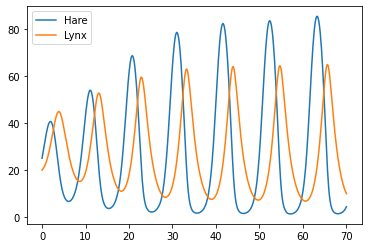

In [ ]:
import control
import numpy as np
import matplotlib.pyplot as plt

def predprey_rhs(t, x, u, params):
    #parametros
    a = params.get ('a', 3.2)
    b = params.get ('b', 0.6)
    c = params.get ('c', 50.0)
    d = params.get ('d', 0.56)
    k = params.get ('k', 125)
    r = params.get ('r', 1.6)

    #variables
    H = x[0]
    L = x[1]

    #restricciones
    u_0 = u if u > 0 else 0

    #Actualizaciones discretas
    dH = (r + u_0) * H * (1 - H/k) - (a * H * L)/(c + H)
    dL = b * (a * H * L)/(c + H) - d * L

    return [dH, dL]

io_predprey = control.NonlinearIOSystem(
   predprey_rhs, None, inputs=('u'), outputs=('H', 'L'),
   states=('H', 'L'), name='predprey')
X0= [25, 20]                # Initial H,L
T = np.linspace(0, 70, 500) #Simulation 70 years of time

#Simulacion
t, y = control.input_output_response(io_predprey, T, 0, X0)

# Grafico de respuesta
plt.figure(1)
plt.plot(t, y[0])
plt.plot(t, y[1])
plt.legend(['Hare', 'Lynx'])
plt.show(block=False)

In [ ]:
!pip install control

     |████████████████████████████████| 357 kB 5.1 MB/s 
  Created wheel for control: filename=control-0.9.1-py2.py3-none-any.whl size=364703 sha256=2871f4a98d834831ded37954c114b71fb9e4eef814c7342aa11f74a3f5b82361
  Stored in directory: /root/.cache/pip/wheels/b1/50/22/8005107713828997d1af664fbd629c7f935a1b87fc2f4ba6c1
Successfully built control
